In [1]:
import cv2
from openpiv import pyprocess, piv
import numpy as np
import matplotlib.pyplot as plt

In [31]:
from typing import overload

spatial_subsample = 1

vidcap = cv2.VideoCapture("C:/Users/laure/Documents/ARA/laurd_ara/video_processing/fxd_low_1.mp4")
success, image1 = vidcap.read()
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)[100:-80:spatial_subsample,800:1500:spatial_subsample]
count = 0
U = []
V = []

while success and count < 60:
    # cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success, image2 = vidcap.read()
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)[100:-80:spatial_subsample,800:1500:spatial_subsample]
    # print('Read a new frame: ', success)
    if success:
        if count%3==0:
            u,v,s2n = pyprocess.extended_search_area_piv(image1, image2,window_size=64,overlap=32);
            x,y = pyprocess.get_coordinates(image1.shape[:2],search_area_size=64,overlap=32)
            image1 = image2.copy()
            
            U.append(u)
            V.append(v)
        count += 1

In [32]:
U = np.stack(U)
Umean = np.mean(U, axis=0)
V = np.stack(V)
Vmean = np.mean(V,axis=0)

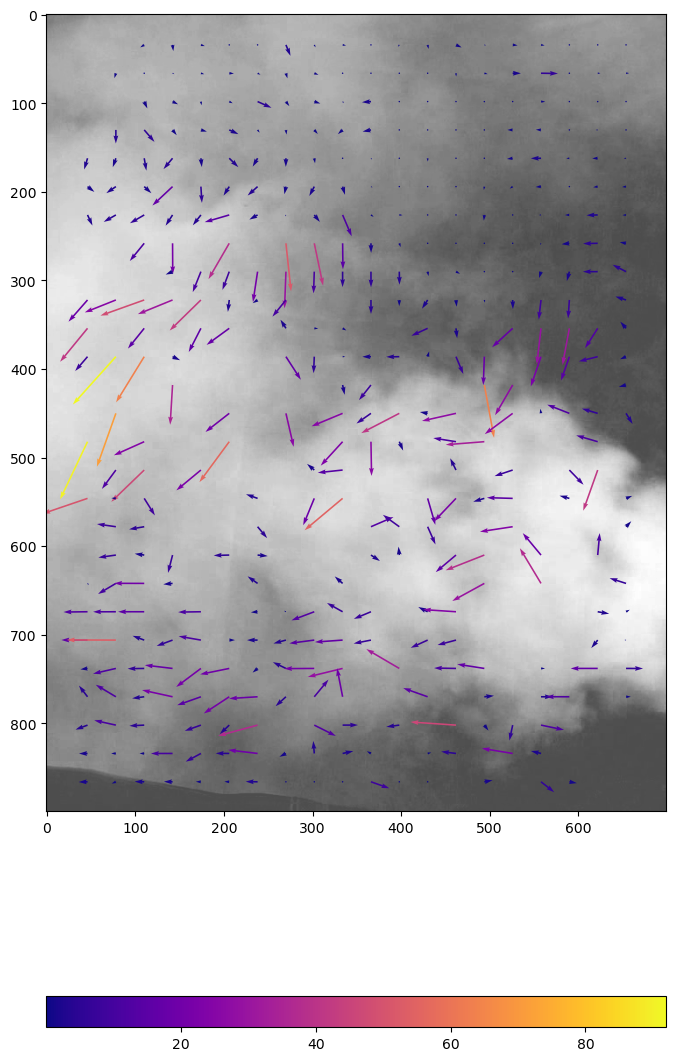

In [33]:
fig,ax = plt.subplots(figsize=(8,16))
ax.imshow(image1,alpha=0.7,cmap="gray")
Q= ax.quiver(x,y,Umean,Vmean,Umean**2+Vmean**2, cmap="plasma")#,scale=50, width=.007)
# plt.show()
# plt.plot(np.mean(Umean,axis=1)*30,y[:,0],color='r',lw=3)
plt.colorbar(Q, orientation='horizontal')

In [16]:
x

array([[35.]])